In [68]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
import missingno as msno

sns.set_style("darkgrid")
wr.filterwarnings("ignore")

In [69]:
# Loading and reading dataset
df = pd.read_excel("/content/side_effect_data 1.xlsx")
df.head()

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0
1,140,Male,1939-10-12,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,Toz,NaN,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",NaN,81.0,181.0
2,2,Female,1976-12-17,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0
3,83,Male,1977-06-17,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",NaN,Astim,"Kalp Hastaliklari, Kanser",AB RH-,NaN,165.0
4,7,Female,1976-09-03,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,NaN,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.0,172.0


In [70]:
# Update column names in new format
df.rename(
    columns={
        "Kullanici_id": "kullanici_id",
        "Cinsiyet": "cinsiyet",
        "Dogum_Tarihi": "dogum_tarihi",
        "Uyruk": "uyruk",
        "Il": "il",
        "Ilac_Adi": "ilac_adi",
        "Ilac_Baslangic_Tarihi": "ilac_baslangic_tarihi",
        "Ilac_Bitis_Tarihi": "ilac_bitis_tarihi",
        "Yan_Etki": "yan_etki",
        "Yan_Etki_Bildirim_Tarihi": "yan_etki_bildirim_tarihi",
        "Alerjilerim": "alerjilerim",
        "Kronik Hastaliklarim": "kronik_hastaliklarim",
        "Baba Kronik Hastaliklari": "baba_kronik_hastaliklari",
        "Anne Kronik Hastaliklari": "anne_kronik_hastaliklari",
        "Kiz Kardes Kronik Hastaliklari": "kiz_kardes_kronik_hastaliklari",
        "Erkek Kardes Kronik Hastaliklari": "erkek_kardes_kronik_hastaliklari",
        "Kan Grubu": "kan_grubu",
        "Kilo": "kilo",
        "Boy": "boy"
    },
    inplace=True
)

# Exploratory Data Analysis (EDA)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   kullanici_id                      2357 non-null   int64         
 1   cinsiyet                          1579 non-null   object        
 2   dogum_tarihi                      2357 non-null   datetime64[ns]
 3   uyruk                             2357 non-null   object        
 4   il                                2130 non-null   object        
 5   ilac_adi                          2357 non-null   object        
 6   ilac_baslangic_tarihi             2357 non-null   datetime64[ns]
 7   ilac_bitis_tarihi                 2357 non-null   datetime64[ns]
 8   yan_etki                          2357 non-null   object        
 9   yan_etki_bildirim_tarihi          2357 non-null   datetime64[ns]
 10  alerjilerim                       1873 non-null 

- There are 2357 observations (rows) and 19 features (columns) in the dataset.
- There are 12 categorical, 3 numerical and 4 date-time variables.

In [36]:
# Missing value check
print(df.isnull().sum())

kullanici_id                          0
cinsiyet                            778
dogum_tarihi                          0
uyruk                                 0
il                                  227
ilac_adi                              0
ilac_baslangic_tarihi                 0
ilac_bitis_tarihi                     0
yan_etki                              0
yan_etki_bildirim_tarihi              0
alerjilerim                         484
kronik_hastaliklarim                392
baba_kronik_hastaliklari            156
anne_kronik_hastaliklari            217
kiz_kardes_kronik_hastaliklari       97
erkek_kardes_kronik_hastaliklari    121
kan_grubu                           347
kilo                                293
boy                                 114
dtype: int64


- Missing values are observed in many variables, especially in the gender variable.

In [37]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
kullanici_id,2357.0,97.216801,1.0,47.0,97.0,146.0,196.0,57.0172
dogum_tarihi,2357,1974-11-25 04:06:12.677131936,1939-10-12 00:00:00,1959-02-05 00:00:00,1973-09-09 00:00:00,1992-03-24 00:00:00,2011-04-25 00:00:00,NaN
ilac_baslangic_tarihi,2357,2022-01-07 10:47:36.173101312,2022-01-01 00:00:00,2022-01-04 00:00:00,2022-01-07 00:00:00,2022-01-11 00:00:00,2022-01-14 00:00:00,NaN
ilac_bitis_tarihi,2357,2022-03-10 16:25:27.365294848,2022-03-02 00:00:00,2022-03-06 00:00:00,2022-03-11 00:00:00,2022-03-15 00:00:00,2022-03-19 00:00:00,NaN
yan_etki_bildirim_tarihi,2357,2022-02-10 17:09:30.742044928,2022-02-01 04:34:33,2022-02-04 05:29:20,2022-02-09 20:53:54,2022-02-17 07:08:01,2022-02-19 21:47:39,NaN
kilo,2064.0,80.863857,50.0,65.0,83.0,96.0,110.0,18.635269
boy,2243.0,174.638431,145.0,160.0,176.0,187.0,203.0,16.516552


- Medication start and end dates are usually at the same time and side effects are often reported after a short period of time.
- The birth dates of the individuals range widely between 1939 and 2011.

In [38]:
df.describe(include = "object").T

,count,unique,top,freq
cinsiyet,1579,2,Female,872
uyruk,2357,1,Turkiye,2357
il,2130,13,Adana,220
ilac_adi,2357,151,chlordiazepoxide-amitriptyline,29
yan_etki,2357,22,Agizda Farkli Bir Tat,229
alerjilerim,1873,28,Domates,118
kronik_hastaliklarim,1965,80,"Alzheimer, Diger",61
baba_kronik_hastaliklari,2201,92,"Alzheimer, Diyabet",64
anne_kronik_hastaliklari,2140,84,"Alzheimer, Astim",110
kiz_kardes_kronik_hastaliklari,2260,85,,168


- The city where users are located is varied, but Adana is the most represented city.
- There is a wide variety of drug names. Chlordiazepoxide-amitriptyline is the most commonly used drug.
- People have a variety of allergies. Tomato is the most frequently reported allergy.

In [39]:
# Examination of categorical variables
print("==================================")
print(df["uyruk"].value_counts())
print("==================================")
print(df["il"].value_counts())
print("==================================")
print(df["yan_etki"].value_counts())
print("==================================")
print(df["alerjilerim"].value_counts())
print("==================================")
print(df["kan_grubu"].value_counts())
print("==================================")

uyruk
Turkiye    2357
Name: count, dtype: int64
il
Adana        220
Mersin       207
Trabzon      195
Canakkale    179
Ankara       179
Eskisehir    174
Antalya      171
Bursa        169
Samsun       153
Istanbul     144
Izmir        121
Malatya      109
Kayseri      109
Name: count, dtype: int64
yan_etki
Agizda Farkli Bir Tat    229
Tansiyon Yukselme        227
Yorgunluk                204
Gormede Bulaniklik       170
Kabizlik                 156
Ishal                    145
Az Uyuma                 141
Terleme                   97
Sinirlilik                81
Gec Bosalma               81
Gucsuzluk                 81
Mide Bulantisi            80
Tansiyon Dusuklugu        74
Carpinti                  72
Istah Artisi              71
Bas Agrisi                71
Karin Agrisi              69
Uykululuk Hali            68
Bulanti                   64
Huzursuzluk               63
Kas Agrisi                58
Deride Morarma            55
Name: count, dtype: int64
alerjilerim
Domates          

In [86]:
# Filtering people with Alzheimer's disease
alzheimer_disease = df[df['kronik_hastaliklarim']
                       .str.contains('Alzheimer', na=False)]

# How many people have Alzheimer's disease?
print(f"Number of people with Alzheimer's disease: "
      f"{alzheimer_disease.shape[0]}")

Number of people with Alzheimer's disease: 343


In [87]:
# Other diseases of people with Alzheimer's disease
alzheimer_disease_other = alzheimer_disease['kronik_hastaliklarim']\
                          .value_counts()
print(alzheimer_disease_other)

kronik_hastaliklarim
Alzheimer, Diger                61
Alzheimer, Astim                57
Kemik Erimesi, Alzheimer        43
Alzheimer, Hipertansiyon        41
KOAH, Alzheimer                 34
Alzheimer                       23
Alzheimer, Guatr                23
Kalp Hastaliklari, Alzheimer    19
Kanser, Alzheimer               13
Kan Hastaliklari, Alzheimer     12
Diyabet, Alzheimer              10
Hipertansiyon, Alzheimer         7
Name: count, dtype: int64


- Alzheimer's disease is unlikely to occur alone. Most people suffer from at least one other chronic disease.

In [40]:
#Age calculation
df['age'] = pd.to_datetime("today").year - df["dogum_tarihi"].dt.year

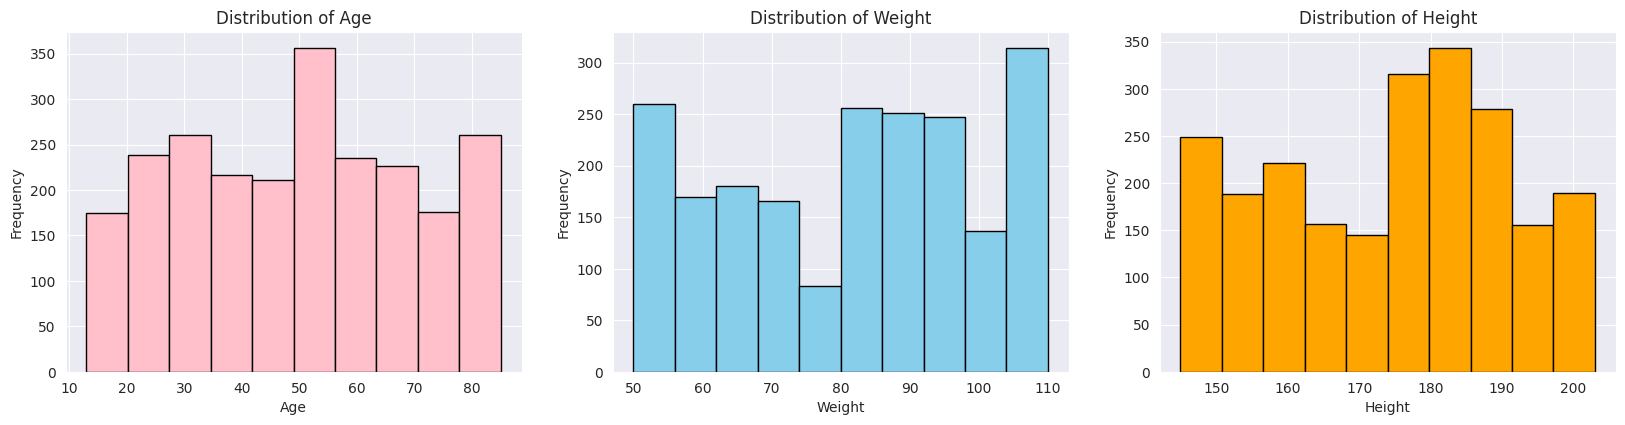

In [41]:
# Distribution of Numerical Variables
plt.figure(figsize = (20,15))

plt.subplot(3,3,1)
plt.hist(df["age"], edgecolor="black", color="pink")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")

plt.subplot(3,3,2)
plt.hist(df["kilo"], edgecolor="black", color="skyblue")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.title("Distribution of Weight")

plt.subplot(3,3,3)
plt.hist(df["boy"], edgecolor="black", color="orange")
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.title("Distribution of Height")

plt.show()

- We can say that the majority of people are between the ages of 30 and 60.
- Most of the people are between 80-100 kg.
- We can say that the average height is between 170 cm and 190 cm.

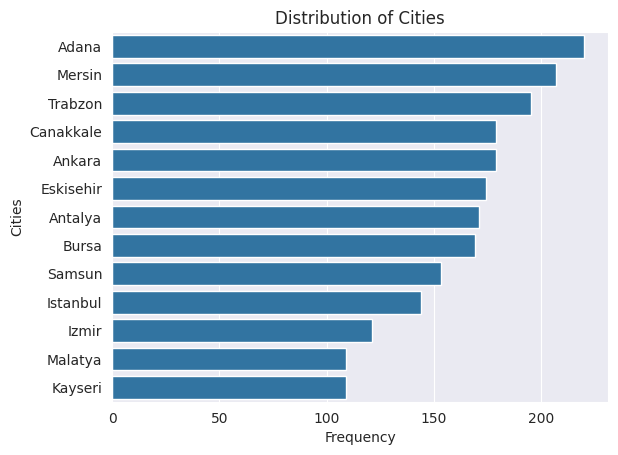

In [42]:
sns.countplot(df, y="il", order=df["il"].value_counts().index)
plt.ylabel("Cities")
plt.xlabel("Frequency")
plt.title("Distribution of Cities")
plt.show()

- Most people from Adana and Mersin.

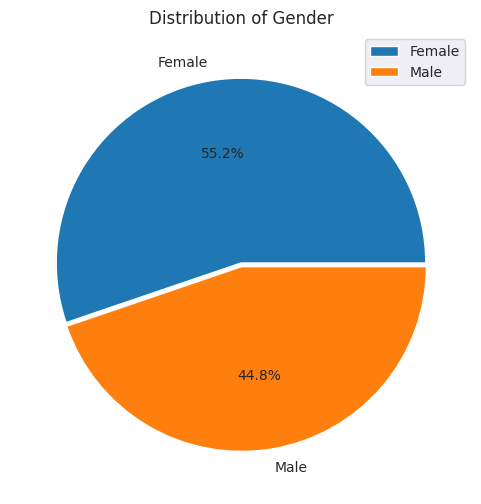

In [43]:
labels = ["Female", "Male"]
count = df["cinsiyet"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(count, labels=labels, autopct="%.1f%%", explode=(0, 0.02))
plt.legend(labels=labels)
plt.title("Distribution of Gender")
plt.show()

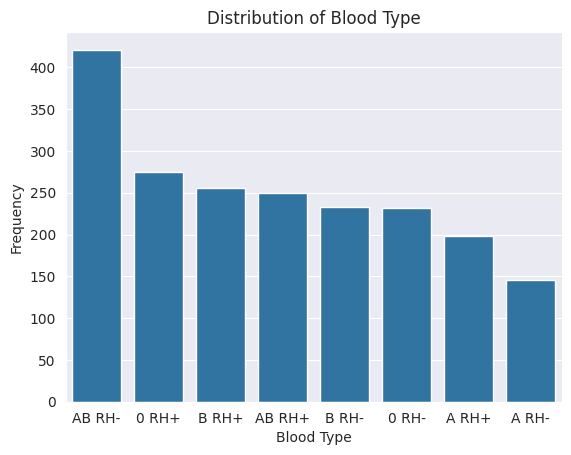

In [44]:
sns.countplot(
    df,
    x="kan_grubu",
    order=df["kan_grubu"].value_counts().index
)
plt.xlabel("Blood Type")
plt.ylabel("Frequency")
plt.title("Distribution of Blood Type")
plt.show()

- Individuals with AB RH- blood group are more.

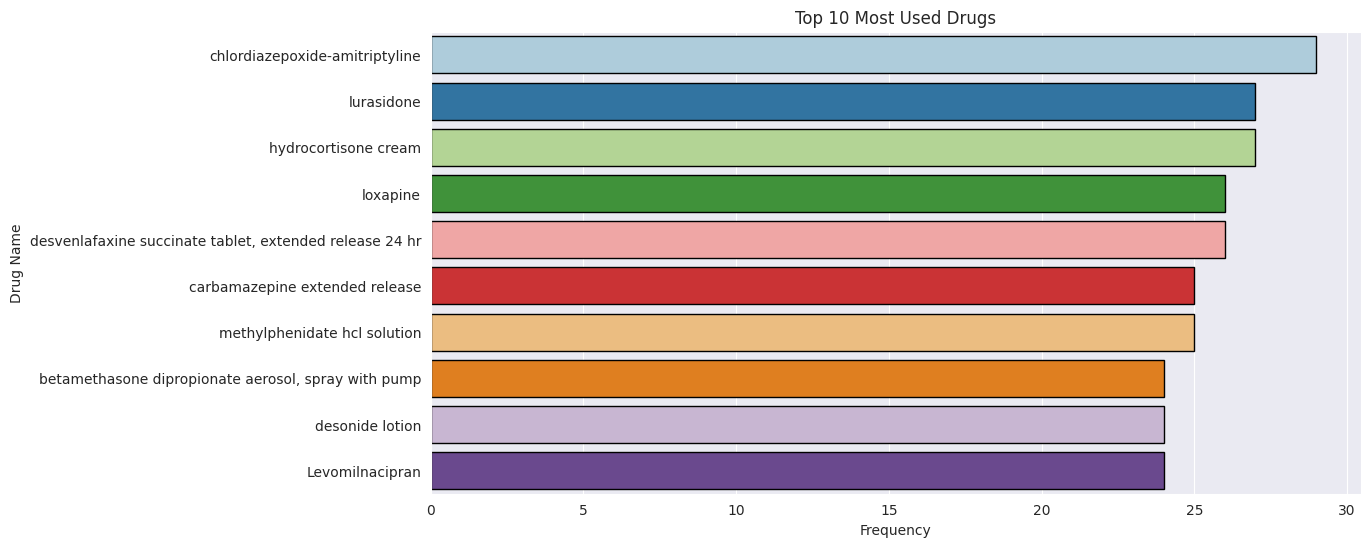

In [45]:
top_10_drugs = df["ilac_adi"].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.countplot(
    df, y="ilac_adi", order=top_10_drugs,
    palette="Paired", edgecolor="black"
)
plt.ylabel("Drug Name")
plt.xlabel("Frequency")
plt.title("Top 10 Most Used Drugs")
plt.show()

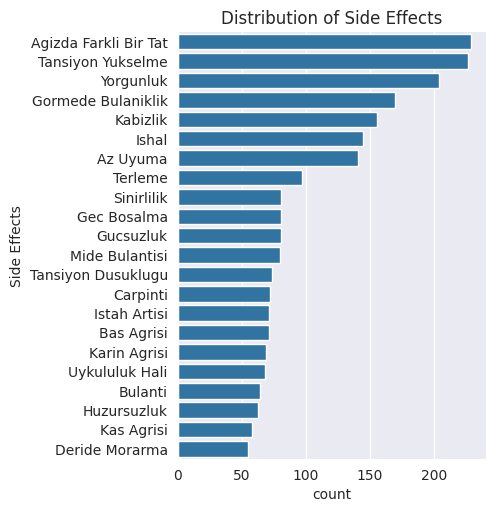

In [46]:
sns.catplot(
    data=df, y="yan_etki", kind="count",
    order=df["yan_etki"].value_counts().index
)
plt.ylabel("Side Effects")
plt.title("Distribution of Side Effects")
plt.show()

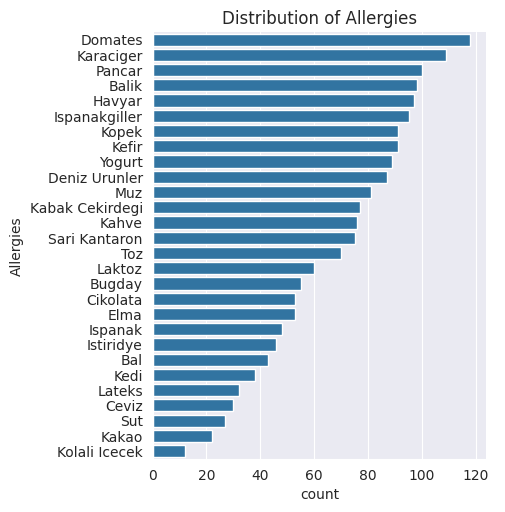

In [47]:
sns.catplot(
    data=df, y="alerjilerim", kind="count",
    order=df["alerjilerim"].value_counts().index
)
plt.ylabel("Allergies")
plt.title("Distribution of Allergies")
plt.show()

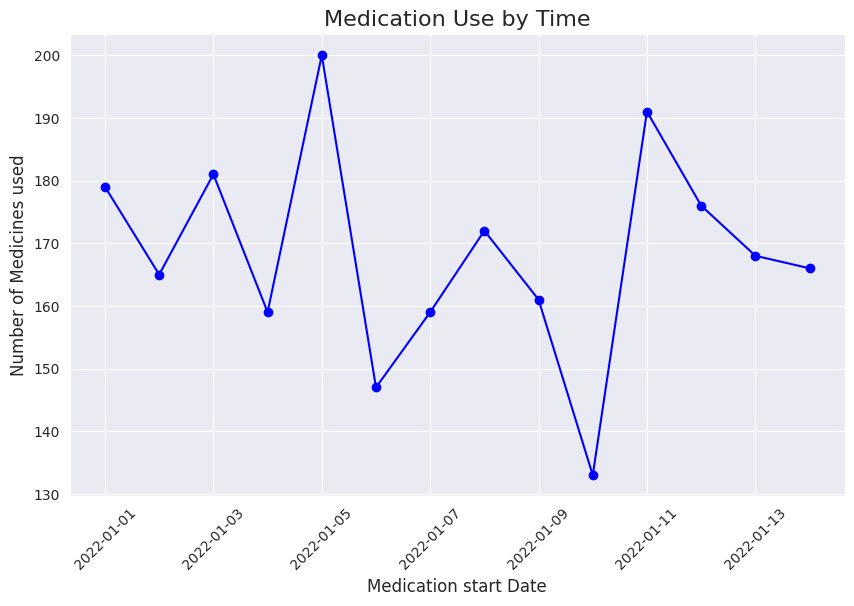

In [67]:
medication_use = df.groupby('ilac_baslangic_tarihi').size()

plt.figure(figsize=(10, 6))
plt.plot(medication_use.index, medication_use.values, color='blue', marker='o')
plt.xlabel("Medication start Date", fontsize=12)
plt.ylabel("Number of Medicines used", fontsize=12)
plt.xticks(rotation=45)
plt.title("Medication Use by Time", fontsize=16)
plt.show()

In [48]:
# How long after starting the medication did the side effects start to appear?

df_ = df.copy()

# Calculate the difference between two dates (in terms of days)
df_["side_effect_duration"] = (
    df_["yan_etki_bildirim_tarihi"] - df_["ilac_baslangic_tarihi"]
).dt.days

print(df_[["ilac_baslangic_tarihi", "yan_etki_bildirim_tarihi",
           "side_effect_duration"]].head())

  ilac_baslangic_tarihi yan_etki_bildirim_tarihi  side_effect_duration
0            2022-01-09      2022-02-19 18:28:43                    41
1            2022-01-09      2022-02-03 20:48:17                    25
2            2022-01-11      2022-02-04 05:29:20                    24
3            2022-01-04      2022-02-08 01:01:21                    35
4            2022-01-13      2022-02-12 05:33:06                    30


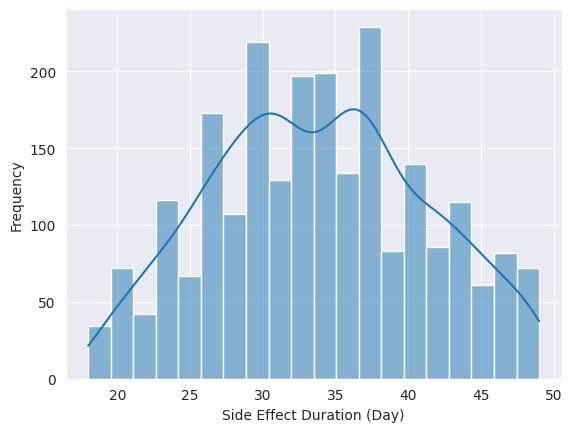

In [49]:
sns.histplot(df_["side_effect_duration"], bins=20, kde=True)
plt.xlabel("Side Effect Duration (Day)")
plt.ylabel("Frequency")
plt.show()

- The medicines show side effects between 25-40 days after they are started.

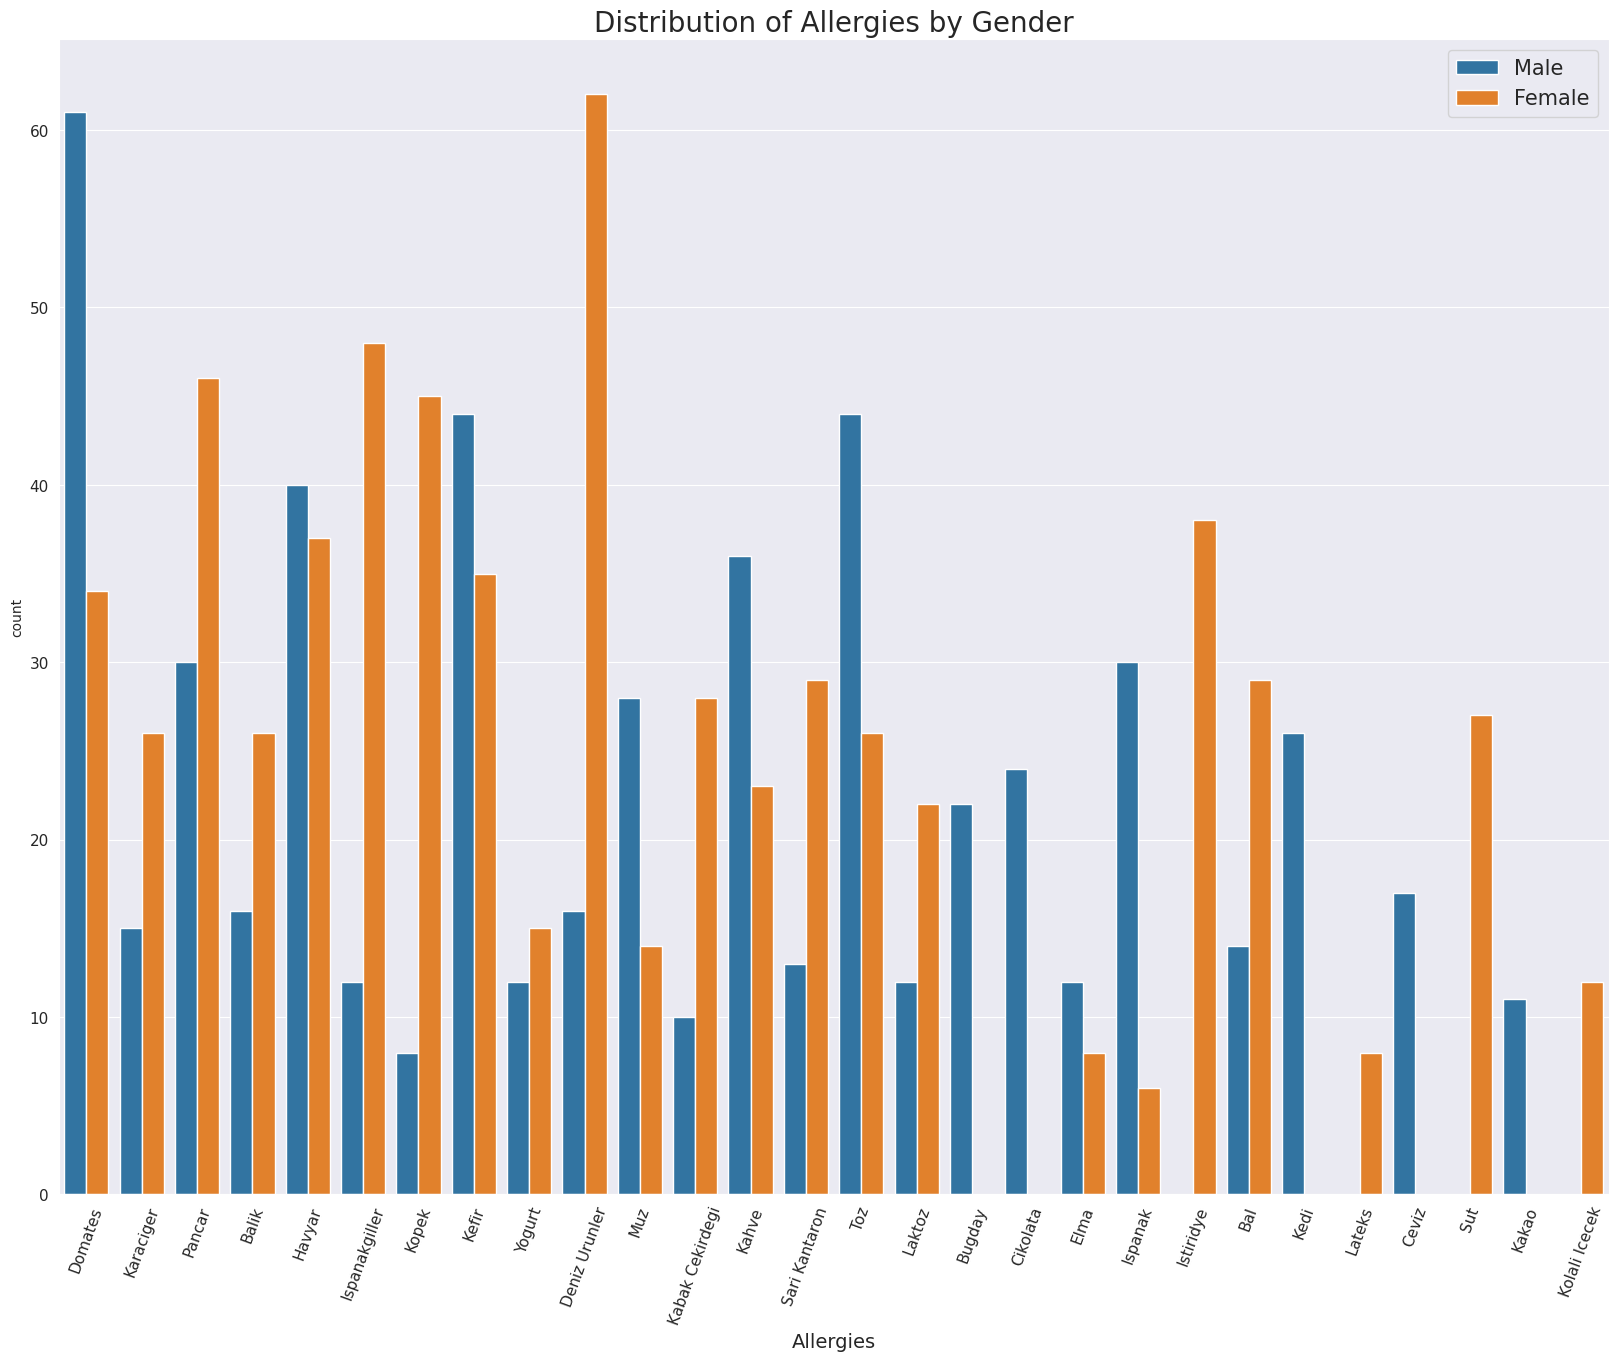

In [50]:
plt.figure(figsize= (20, 15))
sns.countplot(df, x="alerjilerim", hue="cinsiyet",
              order=df["alerjilerim"].value_counts().index
)
plt.xlabel("Allergies", fontsize=14)
plt.title("Distribution of Allergies by Gender", fontsize=20)
plt.xticks(rotation=70, fontsize = 11)
plt.yticks(fontsize=11)
plt.legend(fontsize=15)
plt.show()

- People allergic to seafood and dog are more likely to be female.

# Data Pre-Processing

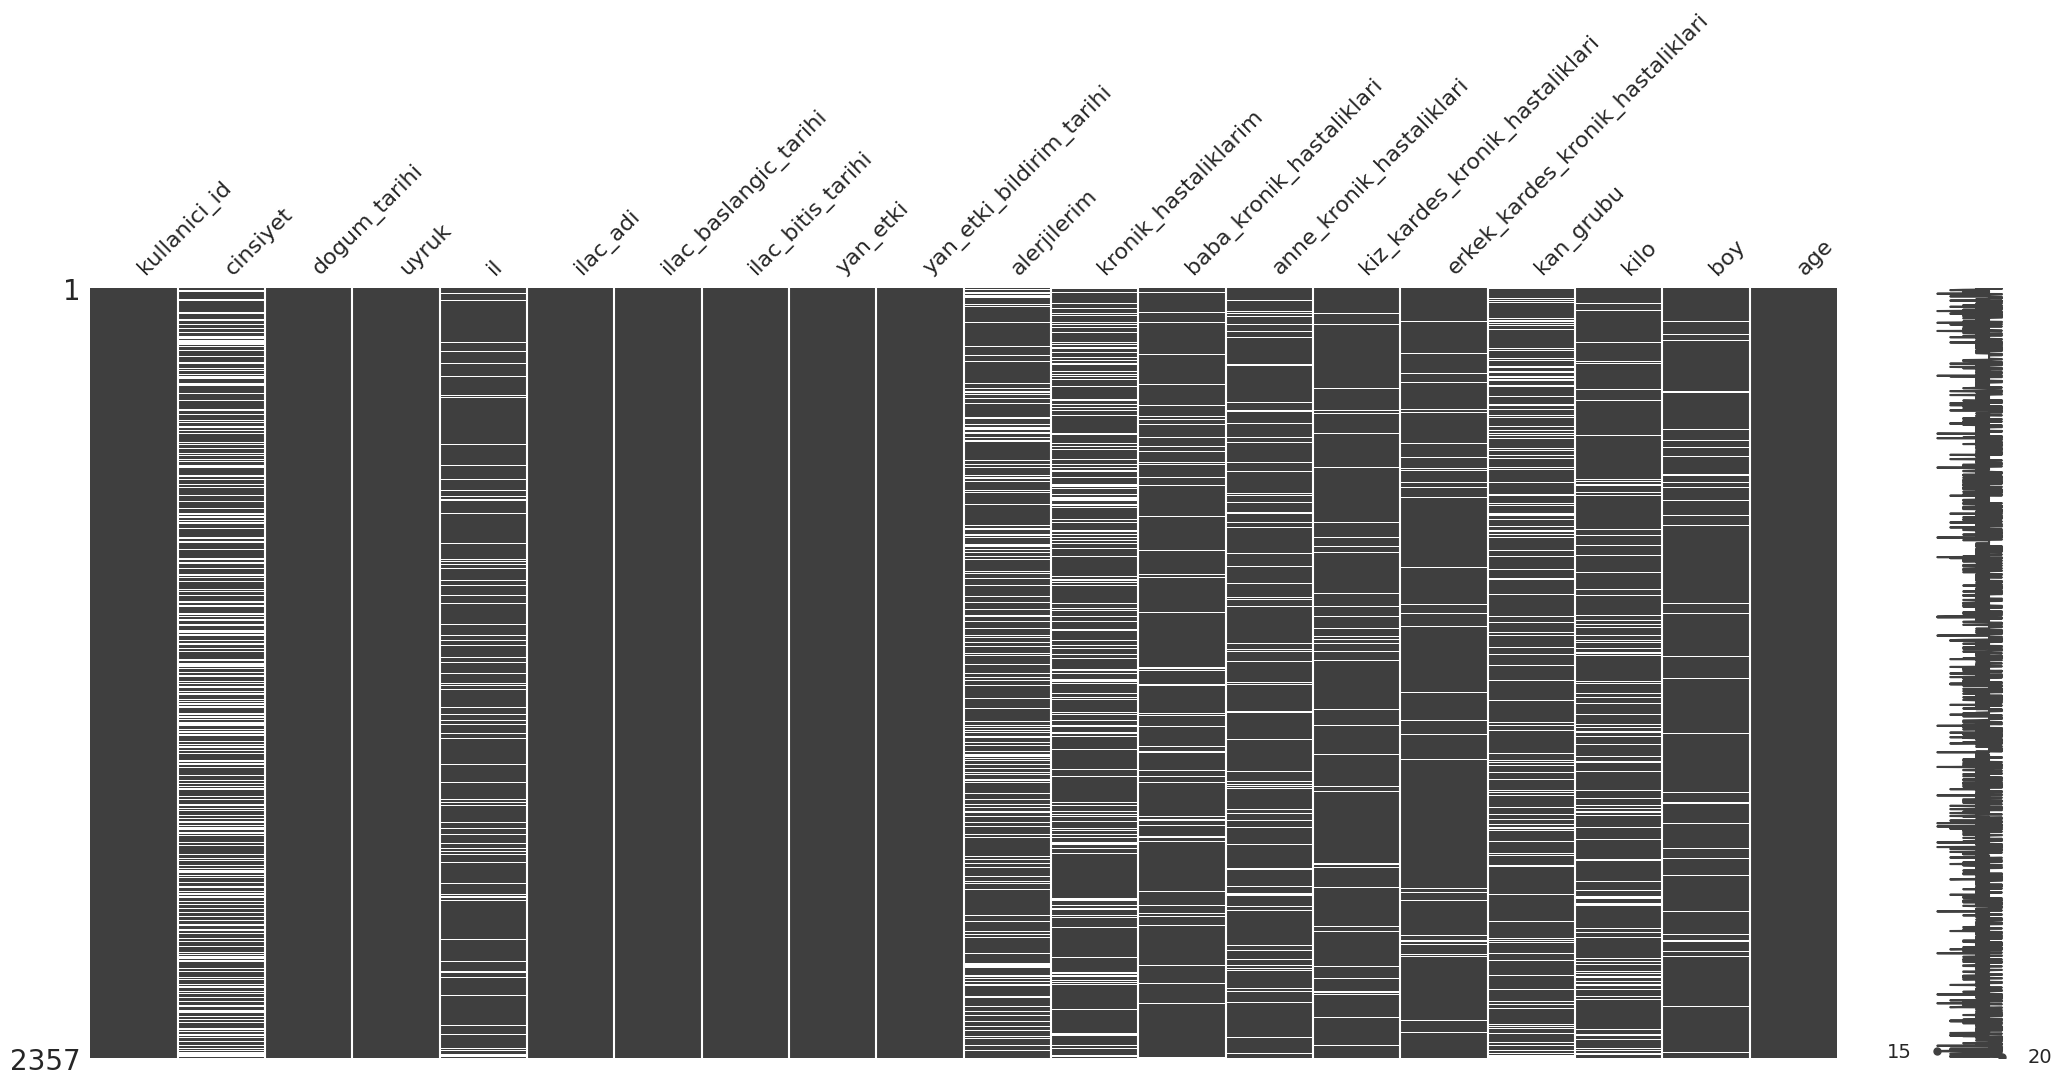

In [51]:
# Visualization of missing data
msno.matrix(df)
plt.show()

- I am removing the date of birth variable because we have already calculated the age variable.
- Since everyone has the same nationality, I am also removing this variable.

In [52]:
df = df.drop(["dogum_tarihi", "uyruk", "kullanici_id"], axis=1)

In [53]:
# Handling missing values for numeric variables
imputer = KNNImputer(n_neighbors=5)
df["kilo"] = imputer.fit_transform(df[["kilo"]])
df["boy"] = imputer.fit_transform(df[["boy"]])

In [54]:
# Handling missing values for numeric variables
columns = ["cinsiyet", "il", "kan_grubu"]

imputer = KNNImputer(n_neighbors=5)

for col in columns:
    # Label encoding
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

    # KNN impute
    df[col] = imputer.fit_transform(df[[col]])

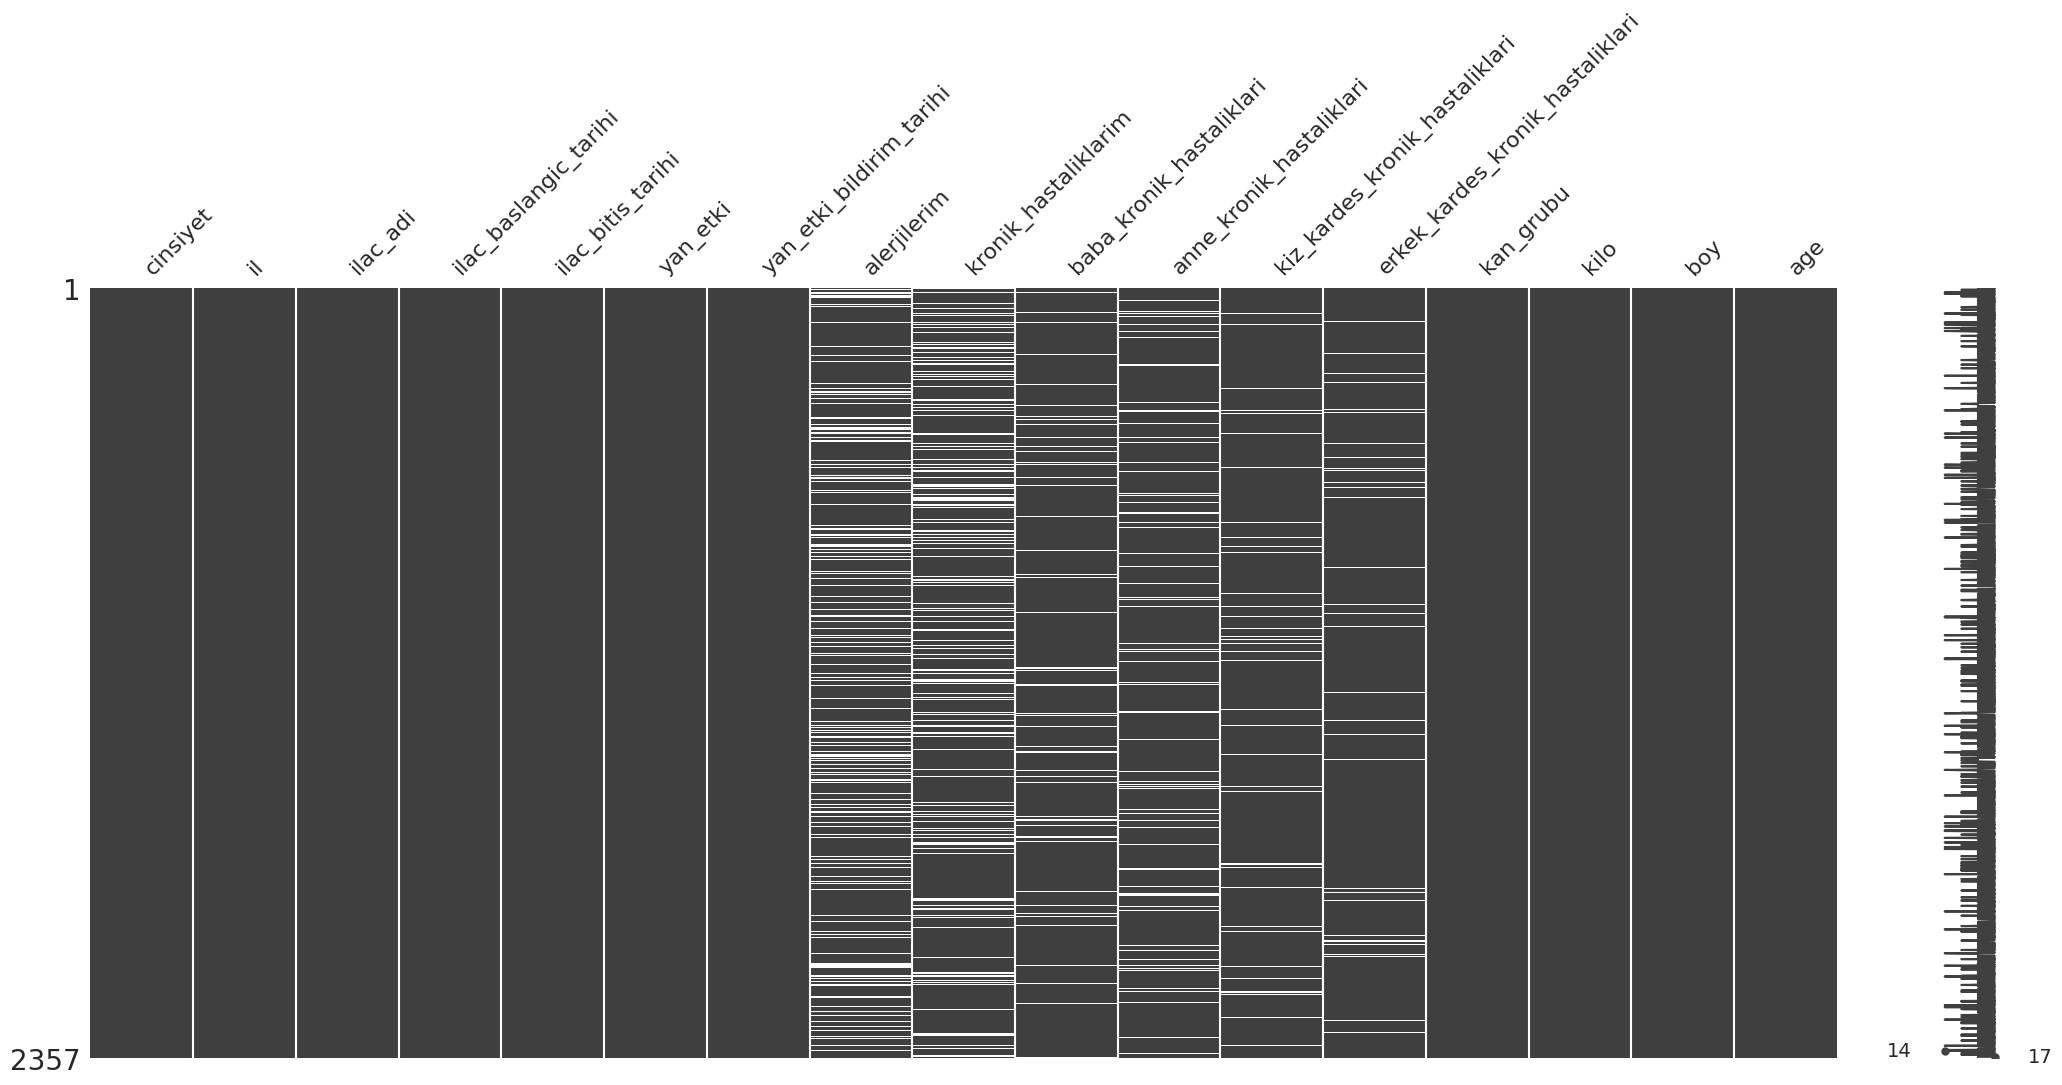

In [55]:
msno.matrix(df)
plt.show()

In [56]:
# Separating observation units
df[["1_kronik_hastalık", "2_kronik_hastalık"]] = (
    df["kronik_hastaliklarim"].str.split(',', expand=True)
)
df[["1_baba_kronik_hastalık", "2_baba_kronik_hastalık"]] = (
    df["baba_kronik_hastaliklari"].str.split(',', expand=True)
)
df[["1_anne_kronik_hastalık", "2_anne_kronik_hastalık"]] = (
    df["anne_kronik_hastaliklari"].str.split(',', expand=True)
)
df[["1_kkardes_kronik_hastalık", "2_kkardes_kronik_hastalık"]] = (
    df["kiz_kardes_kronik_hastaliklari"].str.split(',', expand=True)
)
df[["1_ekardes_kronik_hastalık", "2_ekardes_kronik_hastalık"]] = (
    df["erkek_kardes_kronik_hastaliklari"].str.split(',', expand=True)
)
df.head()

,cinsiyet,il,ilac_adi,ilac_baslangic_tarihi,ilac_bitis_tarihi,yan_etki,yan_etki_bildirim_tarihi,alerjilerim,kronik_hastaliklarim,baba_kronik_hastaliklari,...,1_kronik_hastalık,2_kronik_hastalık,1_baba_kronik_hastalık,2_baba_kronik_hastalık,1_anne_kronik_hastalık,2_anne_kronik_hastalık,1_kkardes_kronik_hastalık,2_kkardes_kronik_hastalık,1_ekardes_kronik_hastalık,2_ekardes_kronik_hastalık
0,1.0,4.0,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",...,Hipertansiyon,Kan Hastaliklari,Guatr,Hipertansiyon,KOAH,None,Kemik Erimesi,Kalp Hastaliklari,Kemik Erimesi,Guatr
1,1.0,12.0,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,Toz,NaN,"Guatr, Diger",...,NaN,NaN,Guatr,Diger,Hipertansiyon,Kalp Hastaliklari,,None,KOAH,Diyabet
2,0.0,4.0,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH",...,Kalp Hastaliklari,Diyabet,Diyabet,KOAH,Kemik Erimesi,Diyabet,Diyabet,Kemik Erimesi,Diger,None
3,1.0,0.0,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",...,Diyabet,Diger,Kalp Hastaliklari,Diger,NaN,NaN,Astim,None,Kalp Hastaliklari,Kanser
4,0.0,7.0,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,NaN,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon",...,Diyabet,Kalp Hastaliklari,Alzheimer,Hipertansiyon,Kan Hastaliklari,Kemik Erimesi,Diyabet,Diger,Alzheimer,Hipertansiyon


- I delete variables from the dataset where I have separated the observation units.

In [57]:
df = df.drop(["kronik_hastaliklarim", "baba_kronik_hastaliklari",
              "anne_kronik_hastaliklari", "kiz_kardes_kronik_hastaliklari",
              "erkek_kardes_kronik_hastaliklari"], axis=1)

In [58]:
# Encoding categorical variables
cat_cols = [
    "1_kronik_hastalık", "2_kronik_hastalık",
    "1_baba_kronik_hastalık", "2_baba_kronik_hastalık",
    "1_anne_kronik_hastalık", "2_anne_kronik_hastalık",
    "1_kkardes_kronik_hastalık", "2_kkardes_kronik_hastalık",
    "1_ekardes_kronik_hastalık", "2_ekardes_kronik_hastalık",
    "yan_etki", "alerjilerim", "ilac_adi"
]
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

In [59]:
df.head()

,cinsiyet,il,ilac_adi,ilac_baslangic_tarihi,ilac_bitis_tarihi,yan_etki,yan_etki_bildirim_tarihi,alerjilerim,kan_grubu,kilo,...,1_kronik_hastalık,2_kronik_hastalık,1_baba_kronik_hastalık,2_baba_kronik_hastalık,1_anne_kronik_hastalık,2_anne_kronik_hastalık,1_kkardes_kronik_hastalık,2_kkardes_kronik_hastalık,1_ekardes_kronik_hastalık,2_ekardes_kronik_hastalık
0,1.0,4.0,138,2022-01-09,2022-03-04,12,2022-02-19 18:28:43,3,7.0,103.000000,...,4,8,5,5,7,11,11,7,11,4
1,1.0,12.0,68,2022-01-09,2022-03-08,21,2022-02-03 20:48:17,26,8.0,81.000000,...,10,12,5,2,6,7,0,11,7,3
2,0.0,4.0,146,2022-01-11,2022-03-12,4,2022-02-04 05:29:20,22,7.0,93.000000,...,6,3,4,6,11,3,4,10,3,11
3,1.0,0.0,140,2022-01-04,2022-03-12,16,2022-02-08 01:01:21,23,5.0,80.863857,...,2,2,8,2,12,12,2,11,8,9
4,0.0,7.0,26,2022-01-13,2022-03-06,0,2022-02-12 05:33:06,28,5.0,99.000000,...,2,7,1,5,9,10,4,2,1,5


In [60]:
# Standardizing numerical features
columns_to_standardize = ["kilo", "age", "boy"]
scaler = StandardScaler()
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

In [61]:
df.head()

,cinsiyet,il,ilac_adi,ilac_baslangic_tarihi,ilac_bitis_tarihi,yan_etki,yan_etki_bildirim_tarihi,alerjilerim,kan_grubu,kilo,...,1_kronik_hastalık,2_kronik_hastalık,1_baba_kronik_hastalık,2_baba_kronik_hastalık,1_anne_kronik_hastalık,2_anne_kronik_hastalık,1_kkardes_kronik_hastalık,2_kkardes_kronik_hastalık,1_ekardes_kronik_hastalık,2_ekardes_kronik_hastalık
0,1.0,4.0,138,2022-01-09,2022-03-04,12,2022-02-19 18:28:43,3,7.0,1.269686,...,4,8,5,5,7,11,11,7,11,4
1,1.0,12.0,68,2022-01-09,2022-03-08,21,2022-02-03 20:48:17,26,8.0,0.007809,...,10,12,5,2,6,7,0,11,7,3
2,0.0,4.0,146,2022-01-11,2022-03-12,4,2022-02-04 05:29:20,22,7.0,0.696106,...,6,3,4,6,11,3,4,10,3,11
3,1.0,0.0,140,2022-01-04,2022-03-12,16,2022-02-08 01:01:21,23,5.0,0.000000,...,2,2,8,2,12,12,2,11,8,9
4,0.0,7.0,26,2022-01-13,2022-03-06,0,2022-02-12 05:33:06,28,5.0,1.040254,...,2,7,1,5,9,10,4,2,1,5


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   cinsiyet                   2357 non-null   float64       
 1   il                         2357 non-null   float64       
 2   ilac_adi                   2357 non-null   int64         
 3   ilac_baslangic_tarihi      2357 non-null   datetime64[ns]
 4   ilac_bitis_tarihi          2357 non-null   datetime64[ns]
 5   yan_etki                   2357 non-null   int64         
 6   yan_etki_bildirim_tarihi   2357 non-null   datetime64[ns]
 7   alerjilerim                2357 non-null   int64         
 8   kan_grubu                  2357 non-null   float64       
 9   kilo                       2357 non-null   float64       
 10  boy                        2357 non-null   float64       
 11  age                        2357 non-null   float64       
 12  1_kron